In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression
# Warning 
from yellowbrick.regressor import ResidualsPlot 

In [2]:
#Read data csv file
data = pd.read_csv('results.csv')
time = data['Time']
X = data['X']
Y = data['Y']
r = data['r']
data.tail()


,Time,X,Y,r
5995,5995,-256.849163,-125.495351,285.868109
5996,5996,-257.861074,-128.928501,288.296535
5997,5997,-253.342540,-132.598135,285.945288
5998,5998,-254.387512,-139.519827,290.135811
5999,5999,-253.303140,-136.684674,287.828388


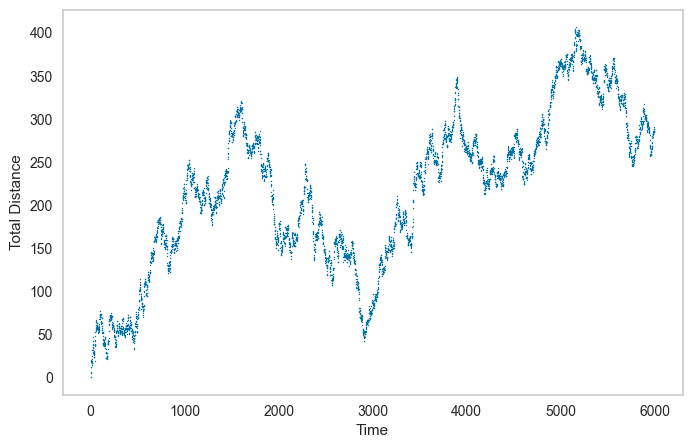

In [16]:
#Plot the time vs. total distance from origin
fig1 = plt.figure(figsize=(8,5))
plt.plot(time,r, 'ob', markersize = 1)
plt.xlabel('Time')
plt.ylabel('Total Distance')  
plt.grid(False)  

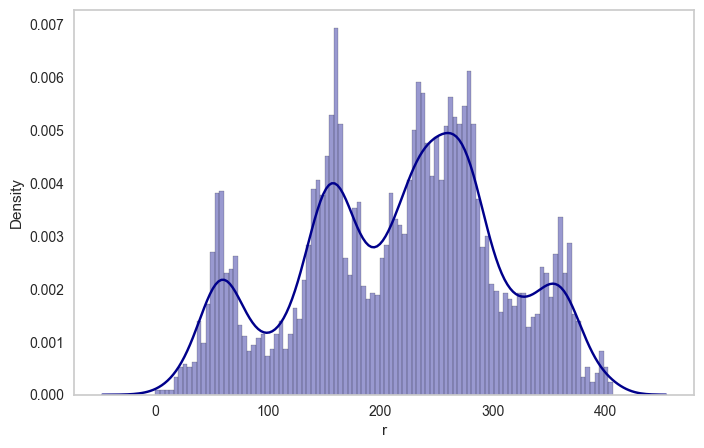

In [17]:
fig2 = plt.figure(figsize=(8,5))
warnings.filterwarnings('ignore')
sns.distplot(r, hist = True, kde = True, bins = 100, color = 'darkblue', hist_kws={'edgecolor': 'black'})
plt.grid(False)  

In [5]:
#calculate the mean square displacement MSD
#Reference: https://www.youtube.com/watch?v=yZ7zHg7goBc

#Define the variable rdiff
rdiff = np.zeros(len(time))

#create tau variable as an array of integers numbers from 1 to 10
tau = list(range(0,200))
#Define mean square displacement 
MSD = np.zeros(len(tau))
for j in range(1,len(tau)): #loop through tau
        sum = 0
        for i in range(j, len(rdiff)): #loop through rdiff
                rdiff[i] = (r[i]-r[i-j])**2 + sum
                sum = rdiff[i]
        MSD[j] = sum/len(rdiff) #calculate mean square displacement


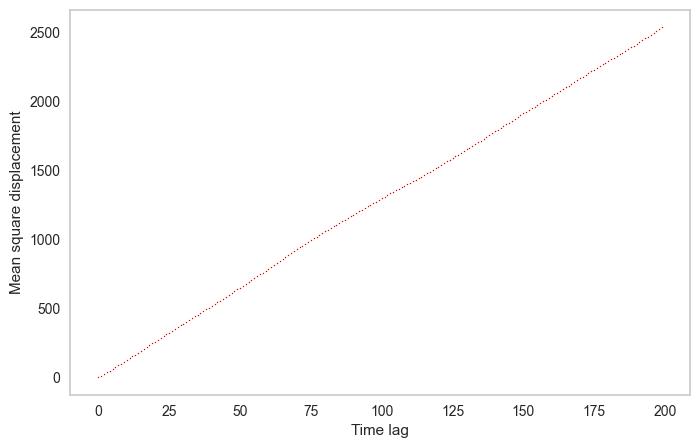

In [18]:
#Plot MSD vs. tau (time lag)
fig3 = plt.figure(figsize=(8,5))
plt.plot(tau,MSD,'or', markersize = 1)
plt.xlabel('Time lag')
plt.ylabel('Mean square displacement')
plt.grid(False)  

In [7]:
#Determining diffusivity constant trhough linear regression
dimension = 2
#MSD = 2*dimension*D*tau
correlacao = np.corrcoef(tau, MSD)
print(correlacao)


[[1.        0.9998449]
 [0.9998449 1.       ]]


<class 'numpy.ndarray'>
15.834969421972346
[12.660815]


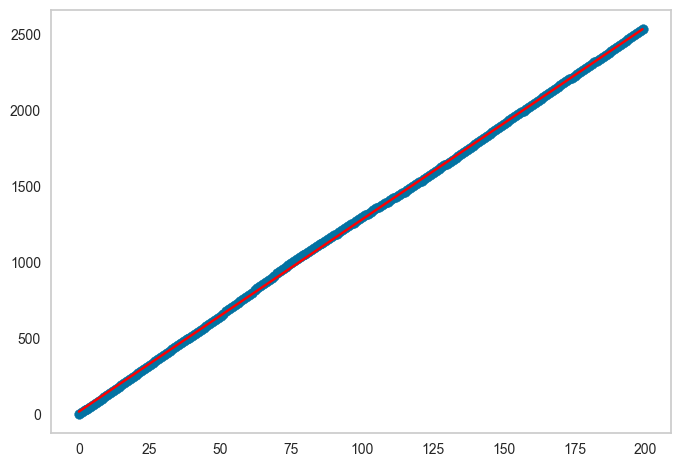

In [19]:
tau = np.array(tau)
print(type(tau))
tau = tau.reshape(-1,1)
modelo = LinearRegression()
modelo.fit(tau, MSD)
# Visualização dos coeficientes
print(modelo.intercept_)
#inclinacao
print(modelo.coef_)

plt.scatter(tau, MSD)
plt.plot(tau, modelo.predict(tau), color = 'red')
plt.grid(False)  

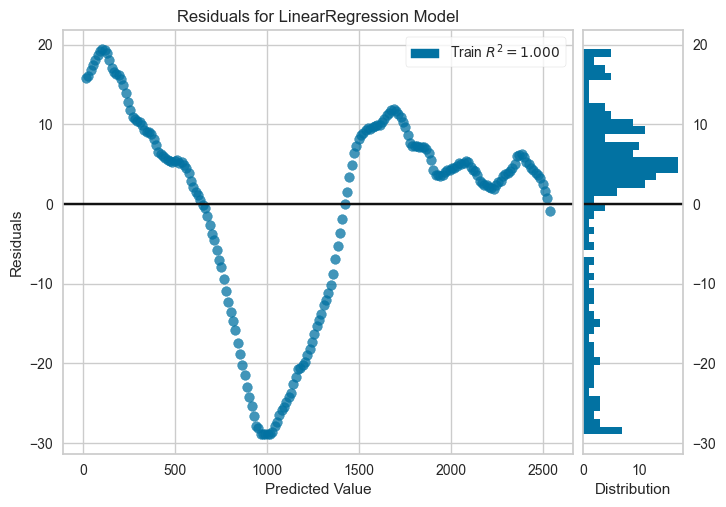

<AxesSubplot: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [23]:
# Gráfico para visualizar os residuais
visualizador = ResidualsPlot(modelo)
visualizador.fit(tau, MSD)
visualizador.poof()